In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:
cat_vectors = np.load(open('../data/cat_vectors_2d.npy', 'rb'))

In [5]:
meta_df = pd.read_csv("../data/categories_meta.tsv", sep='\t')

In [6]:
#? sns.scatterplot

<AxesSubplot:>

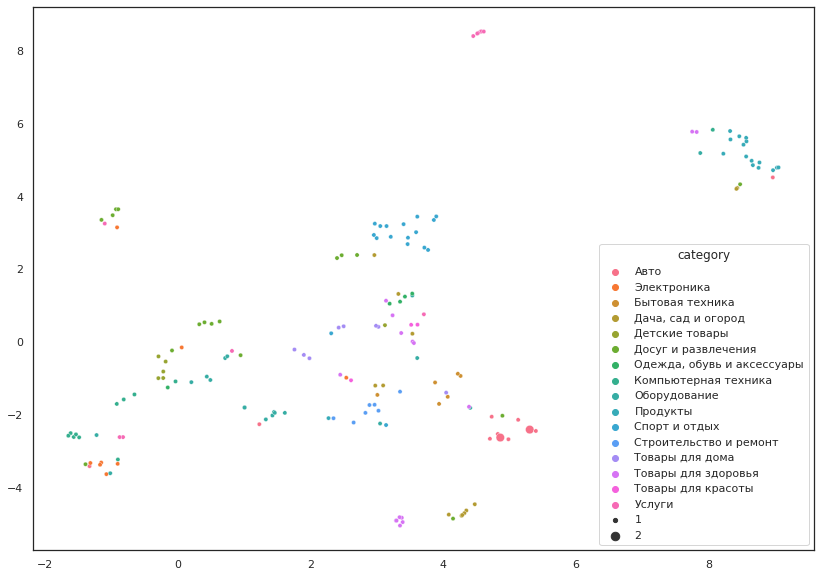

In [7]:
sns.scatterplot(
    x=cat_vectors[:,0].tolist(),
    y=cat_vectors[:, 1].tolist(),
    hue=meta_df.top_category.to_list(),
    size=1 + (meta_df.category == 'Мототехника') + (meta_df.category == 'Транспорт')
)

In [8]:
import sys
sys.path.append('../')

In [9]:
from goods_categorizer.config import DATA_DIR

In [10]:
from goods_categorizer.vectorizer.vectorizer import Vectorizer
from goods_categorizer.vectorizer.dm_reduction import DmReduction

In [11]:
vectors = np.load(open('../data/vectors.npy', 'rb'))

In [12]:
items_df = pd.read_json("../data/good_items.json")

In [13]:
vectorizer = Vectorizer()

In [14]:
reducer = DmReduction(os.path.join(DATA_DIR, 'mapper.pkl'))

In [15]:
vec = vectorizer.model.encode("Художественная литература".lower())

In [16]:
scores = cosine_similarity([vec], vectors)[0]
top_ids = np.argsort(scores)[-5:][::-1]
top_scores = scores[top_ids]

In [17]:
items_df.iloc[top_ids]

,item,category,top_category
516,Детская художественная литература,Развитие и обучение,Детские товары
522,Познавательная литература,Развитие и обучение,Детские товары
1459,Творог,Молочная гастрономия,Продукты
662,Фрески,Хобби и творчество,Детские товары
670,Бумага для рисования,Хобби и творчество,Детские товары


In [18]:
red = reducer.mapper.transform([vec]).tolist()[0]
red

[-0.6909884214401245, -0.6534324288368225]

<AxesSubplot:>

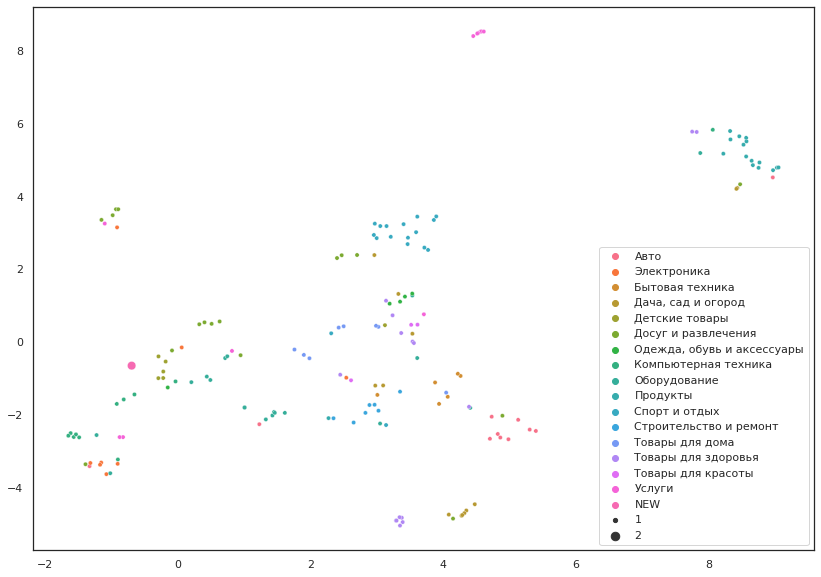

In [19]:
sns.scatterplot(
    x=cat_vectors[:,0].tolist() + [red[0]],
    y=cat_vectors[:, 1].tolist() + [red[1]],
    hue=meta_df.top_category.to_list() + ["NEW"],
    size=[1] * len(cat_vectors) + [2]
)